<a href="https://colab.research.google.com/github/ameyark28/EDA-for-Higher-education-trends-for-Gujarat-India/blob/main/Student%20trend%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing library pandas for data import, dataframe processing and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing tlibrary tabulate for formatting
from tabulate import tabulate

# Read the excel data in pandas datframe
df = pd.read_csv (r'/content/Student_details.csv')

# Data quality checks
data_checks = df.info()
data_checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sr               1378 non-null   int64 
 1   Intake           1378 non-null   object
 2   Season           1378 non-null   object
 3   Year             1378 non-null   int64 
 4   Country          1378 non-null   object
 5   FinalUniversity  1378 non-null   object
 6   Degree           1378 non-null   object
 7   Major            1378 non-null   object
dtypes: int64(2), object(6)
memory usage: 86.2+ KB


| Season   |   # Intake |
|----------+------------|
| Fall     |        844 |
| Spring   |        491 |
| Summer   |         43 |


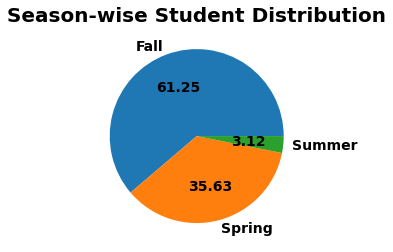

In [3]:
#Count the number of students by each season
studentbyseason = pd.DataFrame(df.Season.value_counts())
print(tabulate(studentbyseason, headers=["Season", "# Intake"], tablefmt='orgtbl'))

#Plot the pie chart to depict number of student by season
ax1 = df.groupby('Season').size().plot(kind='pie', 
                                        autopct='%.2f', 
                                        textprops={'fontsize': 14, 'fontweight' : 'bold'})
#Exclude unnecesarry Y label
plt.ylabel("")
ax1.set_title("Season-wise Student Distribution", 
              fontdict= { 'fontsize': 20, 'fontweight':'bold'})
#Print the plot
plt.show()


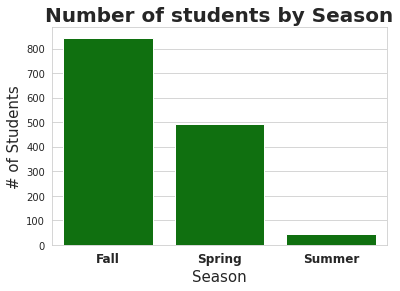

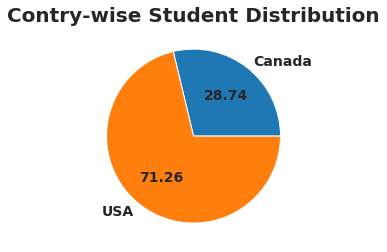

In [4]:
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots.
sns.set_style(style = 'whitegrid')

ax = sns.countplot(data = df, x = 'Season', color = 'green', order = df['Season'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight = 'bold')
ax.set_xlabel(xlabel="Season", fontsize=15)
ax.set_ylabel(ylabel="# of Students", fontsize=15)
ax.set_title('Number of students by Season',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

#pie chart represnting country wise count of students
ax1 = df.groupby('Country').size().plot(kind='pie', 
                                        autopct='%.2f', 
                                        textprops={'fontsize': 14, 'fontweight' : 'bold'})
plt.ylabel("")
ax1.set_title("Contry-wise Student Distribution", 
              fontdict= { 'fontsize': 20, 'fontweight':'bold'})
#Print the plot
plt.show()

In [5]:
#University and degree preference among students 
print("\n Students inclination towards university preference")
top_universities = pd.DataFrame(df.FinalUniversity.value_counts()).head(10)
print(tabulate(top_universities, headers=["Final university", "# Intake"], tablefmt='orgtbl'))

print("\n Students inclination towards degree preference")
top_degrees = pd.DataFrame(df.Degree.value_counts()).head(10)
print(tabulate(top_degrees, headers=["Final university", "# Intake"], tablefmt='orgtbl'))


 Students inclination towards university preference
| Final university                |   # Intake |
|---------------------------------+------------|
| University of Windsor           |         99 |
| Northeastern University         |         89 |
| Arizona State University        |         63 |
| San José State University       |         60 |
| University of Texas, Arlington  |         51 |
| University of Texas at Dallas   |         44 |
| Stevens Institute of Technology |         40 |
| Dalhousie University            |         34 |
| Mohawk College                  |         28 |
| North Carolina State University |         22 |

 Students inclination towards degree preference
| Final university    |   # Intake |
|---------------------+------------|
| Master of Science   |        775 |
| ME                  |        158 |
| Masters             |        113 |
| Diploma             |         51 |
| Bachelor of Science |         49 |
| Master              |         43 |
| MS          

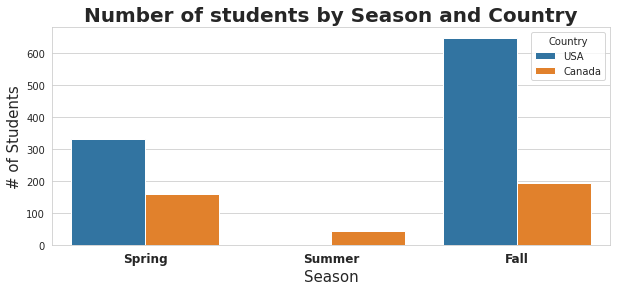

In [6]:
# Setting the length and width of the graph
fig = plt.figure(figsize = (10,4))

# Plot the bar graph of Season for each country (color coding) 
ax = sns.countplot(data = df, x = 'Season', hue = 'Country')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight = 'bold')
ax.set_xlabel(xlabel="Season", fontsize=15)
ax.set_ylabel(ylabel="# of Students", fontsize=15)
ax.set_title('Number of students by Season and Country',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()


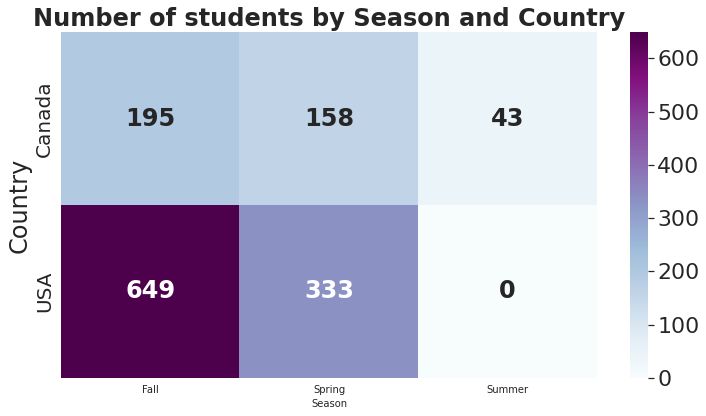

In [7]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#Set the layout of the figure/graph
fig, ax = plt.subplots(
        figsize=(12,4), 
        gridspec_kw=dict(top=2.2, bottom=1))

# Set the font size of the heatmap text
sns.set(font_scale=2)

#heat map chart represnting country and season-wise count of students
res = sns.heatmap(pd.crosstab(df['Country'], df['Season']), annot = True, 
            annot_kws={"size": 24, 'fontweight':'bold'}, cmap="BuPu", fmt='g')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 20)

plt.ylabel("Country", fontsize=24) 
ax.set_title('Number of students by Season and Country',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.show()


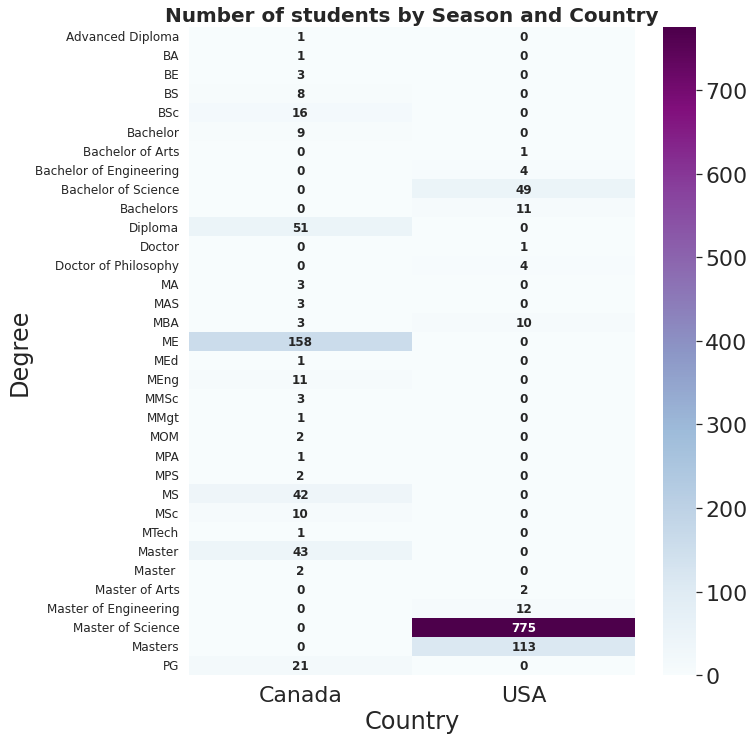

In [8]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# Build the figure instance with the desired height and width
fig, ax = plt.subplots(
        figsize=(10,3), 
        gridspec_kw=dict(top=4, bottom=1))

res = sns.heatmap(pd.crosstab(df['Degree'], df['Country']), yticklabels = 1, 
            annot = True, annot_kws={"size": 12, 'fontweight':'bold'}, 
            cmap="BuPu", fmt='g')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)

#Set the axis tile with font size
ax.set_title('Number of students by Season and Country', fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()


Text(0, 0.5, 'Intake of Student')

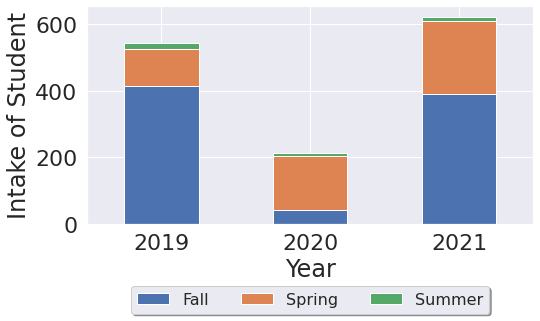

In [9]:
#Creat data fro stacked bar plot
year_intake = pd.crosstab(index=df["Year"], 
                          columns=df["Season"])

#stacked bar graph of year vs intake of students
year_intake.plot(kind="bar", 
                 figsize=(8, 4), #Setting the length and width of the graph
                 stacked=True, rot=0) # Set stacked = True to plot stacked bars

# Put a legend to the right of the current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          ncol=3, fancybox=True, shadow=True, prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Intake of Student")

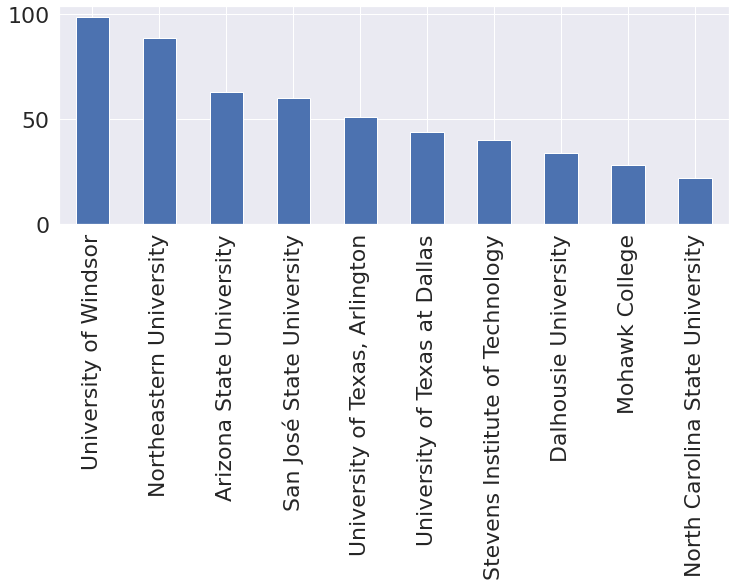

In [10]:
#top 10 Universities filtered by the students count
top10_universities = df["FinalUniversity"].value_counts(ascending = False).head(10)
top10_universities.plot(kind = 'bar',rot = 90,
                             figsize=(12, 4)) #Setting the length and width of the graph)


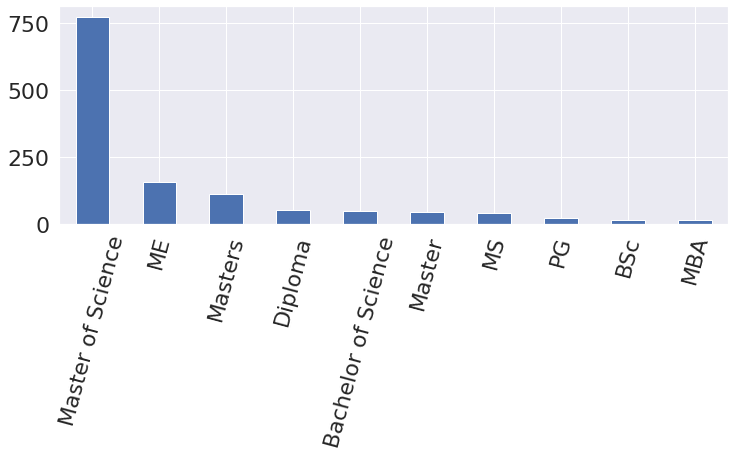

In [11]:
#top 10 degrees enrolled by the maximum no of students
top10_degrees = df["Degree"].value_counts(ascending = False).head(10)
top10_degrees.plot(kind = 'bar', rot = 75,
                             figsize=(12, 4)) #Setting the length and width of the graph)
